# Microsoft Movie Studio Business Project

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [22]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

In [56]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***
* We chose to drop the Studio NaN values, because there were only a few of them, and they wouldn't alter the data.
* We hoose to keep Domestic Gross and Foreign Gross NaN values as Zeroes, since they don't overlap and the other value can give important insight to data set. The zeroes can be omited in  vizualization.
* We cleaned Foreign Gross columns that had objects in it, and change them and the Domestic Gross columns to Int.

### Dropping Studio NaN values:

In [57]:
df.dropna(subset=['studio'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


### Filling the rest of the NaN values with 0 for ease of manipulation:

In [58]:
df.fillna(0, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


### Realized a problem the final stages of cleaning would cause, so created workaroud.
### Removed all Foreign Gross movie data with less than 100000 gross, since it's irrelevant:

In [59]:
df['foreign_gross'] = df['foreign_gross'].apply(str)

In [60]:
counter = -1
for line in df['foreign_gross']:
    counter += 1
    if len(line) < 7:
        try:
            df.drop(counter, inplace=True)
        except:
            continue

In [61]:
counter = -1
for line in df['foreign_gross']:
    counter += 1
    try:
        int(line) < 10000
        df.drop(counter, inplace=True)
    except:
        continue

###  Cleaning Foreign Grossand changing it's type Objec into Int, and Domestic Gross into Int:

In [62]:
df['foreign_gross'] = df['foreign_gross'].apply(str)
df['foreign_gross'] = df['foreign_gross'].map(lambda x: ''.join(x.split(',')))
df['foreign_gross'] = df['foreign_gross'].map(lambda x: ''.join(x.split('.')))
df['foreign_gross'] = df['foreign_gross'].apply(int)
df['domestic_gross'] = df['domestic_gross'].apply(int)

### Chosing rows that were over a billion dollars Foreign Gross and adjusting the value:

In [63]:
df['foreign_gross'] = df['foreign_gross'].map(lambda x: x * 100000 if len(str(x)) == 5 else x)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***
* We decided to combine Domestic and Foreign Gross, since Worldwide is more relevant to our end goal.
* We looked at the top 10 Movies with highest Worldwide gross.
* We looked at the Studio and Year of those to see if they help with our reccomendation.
* We decided to cross-reference this result with Actors, Writers and Directors who were in these movies.

### Creating Total Gross column:

In [65]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

In [78]:
df.sort_values(by='total_gross', ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,1131600000,2015,2068300000
3079,Avengers: Infinity War,BV,678800000,1369500000,2018,2048300000
1873,Jurassic World,Uni.,652300000,1019400000,2015,1671700000
1874,Furious 7,Uni.,353000000,1163000000,2015,1516000000
1875,Avengers: Age of Ultron,BV,459000000,946400000,2015,1405400000
3080,Black Panther,BV,700100000,646900000,2018,1347000000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000,2018,1309500000
2759,Beauty and the Beast (2017),BV,504000000,759500000,2017,1263500000
3082,Incredibles 2,BV,608600000,634200000,2018,1242800000


### Extracting Title and Total Gross value from top 10 highest grossing movies:

In [109]:
height = sorted(df.sort_values(by='foreign_gross', ascending=False)[:10]['total_gross'].tolist())
x = df.sort_values(by='total_gross', ascending=False)[:10]['title'].values.tolist()
x.reverse()

### Setting values in Billions of dollars:

In [110]:
for i in range(len(height)):
    height[i] /= 1000000000

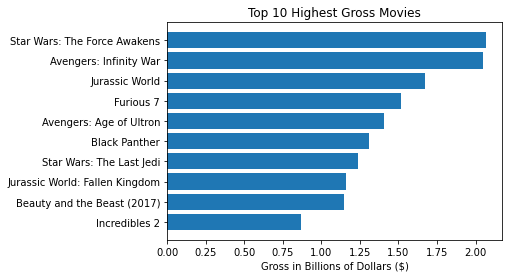

In [113]:
fig, ax = plt.subplots()

ax.barh(x, height)
ax.set_title('Top 10 Highest Gross Movies')
ax.set_xlabel('Gross in Billions of Dollars ($)');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***